
## MINI Project: LOGISTIC REGRESSION and SVM -- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

### Introduction
* For this project will be using North Carolina Schools education data. The data is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI) which is charged with implementing the state's public school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

* Our starting datasets[All_Data_By_School_Final] and [1516_Test_Scores] were taken from Dr. Drews github where he combines multiple datasets from North Carolina Schools education data, preprocesses them and cleans for Machine learning. You can learn more on the data set from Dr.Drew's github https://github.com/jakemdrew/EducationDataNC.

* We performed Visualization on s usbset of the data targeted for schools with `high schools`, which can be accessed from https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory

#Read in raw data

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/All_Data_By_School_Final.csv"
s=requests.get(url).content

schoolData=pd.read_csv(io.StringIO(s.decode('utf-8')))

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/1516_Test_Scores.csv"
t=requests.get(url).content

testScores=pd.read_csv(io.StringIO(t.decode('utf-8')))

#Review raw data before the join
schoolData.info()

#join files using school / unit code
schoolData = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
#highschools = pd.read_csv(wd+'/data/highschools.csv', low_memory=False)
#highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
schoolData.info()


C:\Users\kevolo\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 305 entries, Year to Percent GLP
dtypes: float64(262), int64(17), object(26)
memory usage: 6.0+ MB


### Data Meaning Type 

In [2]:
url = 'https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/DataMeaningType.csv'

s=requests.get(url).content
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_colwidth', 150)
pd.read_csv(io.StringIO(s.decode('utf-8')))


,Attribute,Meaning,Type
0,unit_code,Code to identify School/LEA/State,Object
1,type_cd_txt,Type of school (Chater or Public),Object
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object
3,school_type_txt,Description of School type,Object
4,calendar_only_txt,Description of Calendar (Traditional or Year-Round),object
5,title1_type_flg,Title I Status,bool
6,clp_ind_flg,Consistently low performing school,bool
7,focus_clp_flg,Focus school designation based on CLP,bool
8,summer_program_flg,Summer school program included in Read to Achieve results,bool
9,asm_no_spg_flg,No School Performance Grade due to alternative school status,bool


#### Data Dictionary
> Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [3]:

DataDict=pd.read_csv(io.StringIO(s.decode('utf-8')))

DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.Attribute==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: 
You entered:  


,Attribute,Meaning,Type


### Data Quality

##### *Missing Data Statistics*

> In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discuss the approach for handling them.

In [4]:
schoolData['title1_type_flg'] = schoolData['title1_type_flg'].map({-1:True, 0:False})
schoolData['clp_ind_flg'] = schoolData['clp_ind_flg'].map({-1:True, 0:False})
schoolData['focus_clp_flg'] = schoolData['focus_clp_flg'].map({-1:True, 0:False})
schoolData['summer_program_flg'] = schoolData['summer_program_flg'].map({-1:True, 0:False})
schoolData['asm_no_spg_flg'] = schoolData['asm_no_spg_flg'].map({-1:True, 0:False})
schoolData['no_data_spg_flg'] = schoolData['no_data_spg_flg'].map({-1:True, 0:False})
schoolData['stem_flg'] = schoolData['stem_flg'].map({-1:True, 0:False})
schoolData = schoolData.drop(['street_ad'],axis=1)

##TODO

In [5]:
#Check for missing values
Temp = pd.DataFrame(schoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in schoolData: ',len(schoolData))
print('No of Columns in schoolData: ',len(schoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(schoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(schoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))/len(schoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))/len(schoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(schoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(50)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in schoolData:  2579
No of Columns in schoolData:  304
No. of Columns with Missing data:  228
No  of Complete data columns:  76
No. of Columns with 100% missing Values:  32
No. of Columns more than 95% missing Values:  39
% of Columns with some Missing data:  75.0 %
% of Columns with 100% Missing data:  10.526 %
% of Columns with more than 95% Missing data:  12.829 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0          2579               Percent GLP  100.000000
1          2579            prin_other_pct  100.000000
2          2579           Percent Level 5  100.000000
3          2579         GCE_RPF_State_Pct  100.000000
4          2579           Percent Level 3

> From above we note, of the 304 columns in SchoolData, 228 (74.8%) of them have some missing data. 32(10.5%) of columns have all the data missing where 39 (12.8%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for this columns was not just collected by mistake. On the other hand, for the partally completed datasets, some schools might have left these columns blank if they didn't apply to them.

> For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of missing rows of data with predetermined data, our model maybe baised and throw were predictions off.

In [6]:
#All columns from Original schoolData
AllColumns =schoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(38) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = schoolData[SelectedColumns]

#drop the key column. 
del schoolDataNew['unit_code']

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(schoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)


##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 304 entries, Year to Percent GLP
dtypes: bool(7), float64(262), int64(10), object(25)
memory usage: 5.9+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 265 entries, salary_expense_pct to st_prinyrs_4thru10_pct
dtypes: bool(7), float64(229), int64(10), object(19)
memory usage: 5.1+ MB
None


,salary_expense_pct,Avg_State_Size_08,st_services_expense_pct,lea_local_perpupil_num,lea_benefits_expense_pct,PASSED_EOG_School_Pct,st_instruct_equip_exp_pct,st_advance_dgr_pct,st_prin_other_pct,lea_instruct_equip_exp_pct,...,lea_ap_participation_pct,lea_tchyrs_4thru10_pct,AP_Courses_Offered,st_sat_participation_pct,lea_tchyrs_0thru3_pct,lea_univ_college_courses,lea_supplies_expense_pct,clp_ind_flg,Math SPG Grade,st_prinyrs_4thru10_pct
0,0.488,21.0,0.09,NaN,NaN,0.872,0.01,0.277,0.026,NaN,...,NaN,NaN,NaN,0.49,NaN,NaN,NaN,False,NaN,0.427
1,0.612,21.0,0.09,NaN,NaN,0.903,0.01,0.262,0.026,NaN,...,NaN,NaN,NaN,0.49,NaN,NaN,NaN,False,NaN,0.427
2,NaN,NaN,0.09,1832.54,0.212,NaN,0.01,0.248,0.026,0.009,...,0.15,0.240,NaN,0.49,0.242,NaN,0.074,False,NaN,0.427
3,NaN,NaN,0.09,1832.54,0.212,0.607,0.01,0.285,0.026,0.009,...,0.15,0.256,NaN,0.49,0.276,NaN,0.074,False,NaN,0.427
4,NaN,NaN,0.09,1832.54,0.212,0.709,0.01,0.285,0.026,0.009,...,0.15,0.256,NaN,0.49,0.276,NaN,0.074,False,NaN,0.427


> In the code block above, we drop 38 columns which have >95% of the data missing. We also delete the unit_code column which is a key to identify the school/Lea/state. 

In [7]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(schoolDataNew.columns))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 229 entries, salary_expense_pct to st_prinyrs_4thru10_pct
dtypes: float64(229)
memory usage: 4.5 MB
 
##########################################
#     Columns with Categorical data      #
##########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 26 columns):
esea_status             201 non-null object
no_data_spg_flg         2579 non-null bool
Grad_project_status     597 non-null object
State Gap Compared      153 non-null object
asm_no_spg_flg          2579 non-null bool
type_cd_txt             2579 non-null object
state_ad                2579 non-null object
Closed_Ind_Text         2579 non-null object
New_ind_Txt             2579 non-null object
scity_ad                2579

> In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 129 columns retained with missing data, 120 are of dtype float64. After reviewing individual columns description from the data dictionary, we choose to replace these missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects and bool)
For the 9 categorical columns, we will be replacing the missing values with mode.

In [8]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #categorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
salary_expense_pct                                2419
Avg_State_Size_08                                 1922
st_services_expense_pct                              0
lea_local_perpupil_num                             160
lea_benefits_expense_pct                           160
PASSED_EOG_School_Pct                             1168
st_instruct_equip_exp_pct                            0
st_advance_dgr_pct                                   0
st_prin_other_pct                                    0
lea_instruct_equip_exp_pct                         160
GCE_ALL_Dist_Pct                                  1248
State_Tch_Exp_Pct_0_3_Years                          0
esea_status                                       2378
st_tchyrs_11plus_pct                                 0
wap_num        

> In the code block above, we replaced missing catagorical values with mode and missing continuous values with median. A total of 129 columns with missing values have been cleaned

In [9]:
new_schooldata.shape

(2579, 265)

category_cd
A      63
E    1320
H     505
I     142
M     478
T      71
dtype: int64

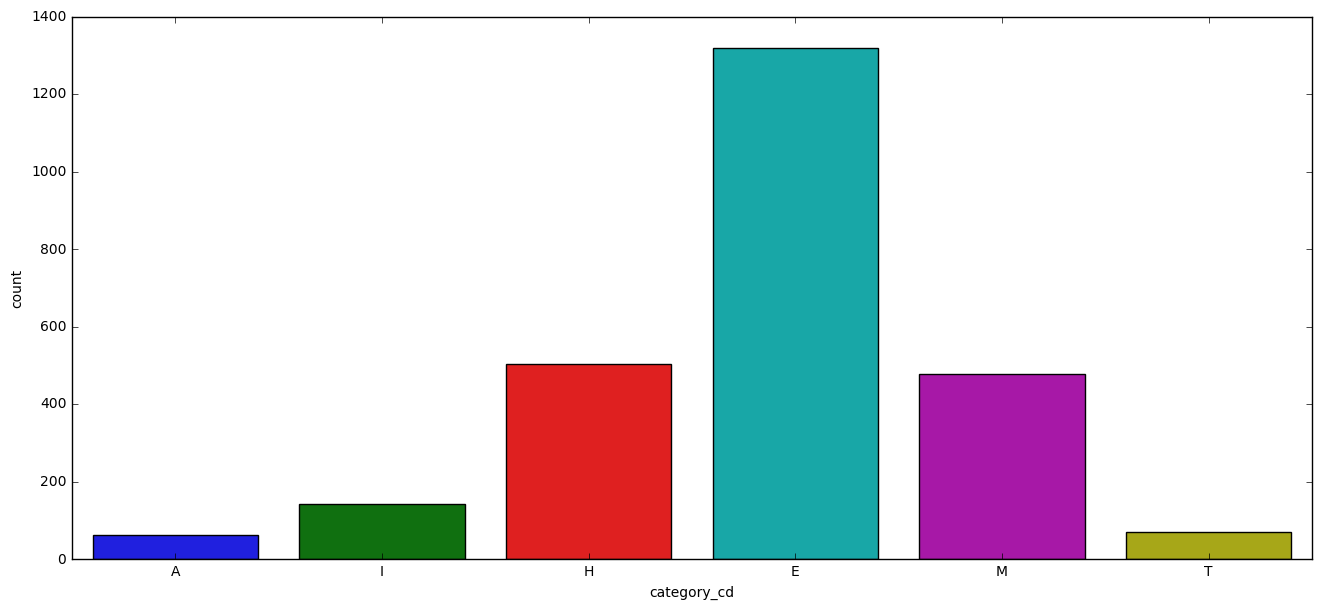

In [10]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

>  The bar graph above is shows the distribution of different school categories in state of North Carolina. See summary table below for school category descriptions and % distribution

Category | Description|Count |Percentage
--- | --- | ---|---
A | School has elementary, middle, and high school grades  | 63|2.44%
E | School has elementary schools grades (PK-5) | 1320|51.18%
H | School has high schools grades (9-13)  | 505|19.58%
I | Schools with elementary, middle and high school grades | 142|5.51%
M | School has middle schools grades (6-8)  | 478|18.53%
T | School has middle and high school grades | 71|2.75%

### New Features

In [11]:
#1
#################################################
#               New Features                    #
#################################################
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["<40", "40-54", "55-69",'70-84',"85-100"]))
#2
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' ] # Weight 0.6
bin2 = ['The ACT Score','ACT WorkKeys Score' ,'Math Course Rigor Score'] # weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))


School_Final = new_schooldata.drop(groupedbins, 1)
School_Final.T


,0,1,2,3,4,5,6,7,8,9,...,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578
salary_expense_pct,0.488,0.612,0.515,0.515,0.515,0.515,0.515,0.515,0.515,0.515,...,0.512,0.55,0.401,0.514,0.568,0.537,0.26,0.294,0.528,0.503
Avg_State_Size_08,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
st_services_expense_pct,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
lea_local_perpupil_num,1984.2,1984.2,1832.54,1832.54,1832.54,1832.54,1832.54,1832.54,1832.54,1832.54,...,1984.2,1984.2,1984.2,1984.2,1984.2,1984.2,1984.2,1984.2,1984.2,1984.2
lea_benefits_expense_pct,0.21,0.21,0.212,0.212,0.212,0.212,0.212,0.212,0.212,0.212,...,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.21
PASSED_EOG_School_Pct,0.872,0.903,0.575,0.607,0.709,0.575,0.575,0.65,0.587,0.575,...,0.765,0.575,0.575,0.575,0.818,0.256,0.5,0.55,0.478,0.455
st_instruct_equip_exp_pct,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
st_advance_dgr_pct,0.277,0.262,0.248,0.285,0.285,0.268,0.248,0.285,0.285,0.248,...,0.262,0.277,0.285,0.248,0.262,0.285,0.285,0.262,0.262,0.262
st_prin_other_pct,0.026,0.026,0.026,0.026,0.026,0.026,0.026,0.026,0.026,0.026,...,0.026,0.026,0.026,0.026,0.026,0.026,0.026,0.026,0.026,0.026
lea_instruct_equip_exp_pct,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,...,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009


In [12]:
School_Final.shape

(2579, 267)

> From above code, we have created two new features from our dataset.

> 1. Overall_Achievement_Score_bins:
this is to groub the Overall Achievement Score into bins 
A: 85-100,
B: 70-84,
C: 55-69,
D: 40-54,
F:<40
> 2. SchoolWeightedScore: Summation of all achievement measures Scores.`EVAAS Growth Score` and `Overall Achievement Score` are put on bin1 and given a  weight 0.6 of the overall weighted school school.`The ACT Score`, `ACT WorkKeys Score` , and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1. When we get to lab two, we will use this features to see if they improve our model performance.


### moving forward we will use this data with the new created features for modeling

In [13]:
modelingdata=School_Final.copy()
modelingdata.head()

,salary_expense_pct,Avg_State_Size_08,st_services_expense_pct,lea_local_perpupil_num,lea_benefits_expense_pct,PASSED_EOG_School_Pct,st_instruct_equip_exp_pct,st_advance_dgr_pct,st_prin_other_pct,lea_instruct_equip_exp_pct,...,AP_Courses_Offered,st_sat_participation_pct,lea_tchyrs_0thru3_pct,lea_univ_college_courses,lea_supplies_expense_pct,clp_ind_flg,Math SPG Grade,st_prinyrs_4thru10_pct,Overall_Achievement_Score_bins,SchoolWeightedScore
0,0.488,21.0,0.09,1984.20,0.210,0.872,0.01,0.277,0.026,0.009,...,7.0,0.49,0.215,0.072774,0.076,False,C,0.427,55-69,173.07
1,0.612,21.0,0.09,1984.20,0.210,0.903,0.01,0.262,0.026,0.009,...,7.0,0.49,0.215,0.072774,0.076,False,C,0.427,55-69,173.07
2,0.515,21.0,0.09,1832.54,0.212,0.575,0.01,0.248,0.026,0.009,...,7.0,0.49,0.242,0.072774,0.074,False,C,0.427,55-69,173.07
3,0.515,21.0,0.09,1832.54,0.212,0.607,0.01,0.285,0.026,0.009,...,7.0,0.49,0.276,0.072774,0.074,False,C,0.427,55-69,173.07
4,0.515,21.0,0.09,1832.54,0.212,0.709,0.01,0.285,0.026,0.009,...,7.0,0.49,0.276,0.072774,0.074,False,C,0.427,55-69,173.07


> # LOGISTIC REGRESSION and SUPPORT VECTOR MACHINE

### SECTION 1  [50 Points ]: 
1. Create a logistic regression model and a support vector machine model for the classification task involved with your dataset.

2. Assess how well each model performs (use 80/20 training/testing split for your data). 
3. Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. 
4. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

### Data Preparation for Classification

#### summer_program_flg  Classification

For this Classification exercise (Logistic regression and SVM) modeling we have choosen to builds models to predict if a school has a summer program  or not which is depicted by the boolean attribute `summer_program_flg` based on all the other features of the North Carolina Education data. In the code block below we create two dataset, the observed data X and an external variable y.

In [14]:
%%time
#Create data = x
df_X = modelingdata.copy()
#create target = Y
df_y = df_X.summer_program_flg
print('X shape before ')
print(df_X.shape)
#drop the response column from the x dataset
df_X.pop('summer_program_flg')
print('X shape after ')
print(df_X.shape)
print('Y shape after ')
print(df_y.shape)



X shape before 
(2579, 267)
X shape after 
(2579, 266)
Y shape after 
(2579,)
Wall time: 5.01 ms


In [15]:
pd.unique(df_X.dtypes)

array([dtype('float64'), dtype('O'), dtype('bool'), dtype('int64'),
       CategoricalDtype(categories=['<40', '40-54', '55-69', '70-84', '85-100'], ordered=True)], dtype=object)

> in above code, we split that data into X and y for modeling

#### RUN CORRELATION to get the highly correlated columns to eliminnate
To improve the perfomance of our logistics regression model, we begin by running a correlation matrix on our X dataset to identify Multicollinearity of predictors and eliminate the highly correlated predictors.

In [16]:
#finding a list of the most correlated features


temp  = df_X.select_dtypes(include=['int','float']) # select int to run corr on
catcols  = df_X.select_dtypes(include=['object', 'bool','O','category']) #category columns
#print(catcols)
print('X df before running correlation')
print(df_X.shape)
c = temp.corr().abs()
s =pd.DataFrame(c.unstack())
#print(s)
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)

#filter to correlation between range
#keepnew =  result[result.Column1 == result.Column2]
result1 =  result[((result.correlation <= 0.95))]

#result1
#combine the columns into a list
col= pd.DataFrame(result1.Column1)
col.columns = ['Columns']
col1 =pd.DataFrame(result1.Column2)
col1.columns = ['Columns']
df = col.append(col1)
#df = df.append(catcols)



#find only unique columns
UniqueColumns =pd.unique(df.Columns)

df_X_temp = df_X[UniqueColumns]

df_X =  pd.concat([df_X_temp, catcols], axis=1)

#shape on the new df_X
df_X.reset_index()
df_y.reset_index()
print('X df after running correlation')
print(df_X.shape)
#print(cols)
##plt.matshow(c)

X df before running correlation
(2579, 266)
X df after running correlation
(2579, 239)


In the code block above we find the run correlation on the X df to identify the most strongly correlated features >0.95 and remove them.  **24 features are eliminated for being highly correlated thus redundant.**

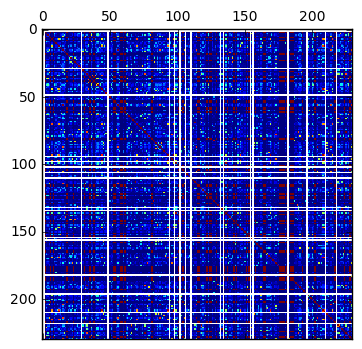

In [17]:
# Display correlation matrix
plt.matshow(c)

### Dropping columns that don't have unique values

In [18]:
## Count unique per columns
#Inspect the high school data fields 
df_X_temp = df_X.copy()
df_X_temp = df_X_temp.describe(include='all').T
# include the data type of the column in the dataframe
df_X_temp['type']= df_X.dtypes
# Reset the index of the dataframe to have index as numbers to have the number of rows visible in the output
df_X_temp.reset_index(inplace=True)
df_X_temp.rename(columns={'index': 'column_name'}, inplace=True)
x= {}
#count unique values per column
for i in df_X.columns:
    #print(i,len(pd.unique(df_X[i])))
    index=i
    unique = len(pd.unique(df_X[i]))
    x.update({index: unique})
temp =pd.DataFrame(list(x.items()), columns=['column_name', 'Unique'])

#merge the two dataframe on column name
df_X_temp = df_X_temp.merge(temp, on='column_name')

# Select columns where unique value is 1
temp1 = df_X_temp[df_X_temp['Unique']==1]

#df_X = df_X.drop(temp1['column_name'], axis =1)

print('###columns to be dropped ####')
df_X.drop( temp1['column_name'], axis=1, inplace=True)
print(temp1['column_name'])



###columns to be dropped ####
169        nat_sat_participation_pct
170                GCE_SWD_State_Pct
171               PROMOTED_State_Pct
172            st_state_perpupil_num
173            st_prinyrs_11plus_pct
174     State_Prin_Exp_Pct_10+_Years
175     st_total_specialized_courses
176                 st_prin_male_pct
177                GCE_ALL_State_Pct
178                st_prin_other_pct
179             PASSED_EOG_State_Pct
180             st_wap_per_classroom
181             PASSED_LAA_State_Pct
182             st_books_per_student
183          st_ap_participation_pct
184        st_stud_internet_comp_num
185          st_supplies_expense_pct
186          st_services_expense_pct
187           st_prinyrs_4thru10_pct
188    State_Prin_Exp_Pct_4_10_Years
189             st_total_expense_num
190     State_Prin_Exp_Pct_0_3_Years
191            st_prinyrs_0thru3_pct
192                   st_cte_courses
193            st_salary_expense_pct
194          st_prin_advance_dgr_pct
195     

In [19]:
print('New Shape')
df_X.shape

New Shape


(2579, 192)

Summer_program_flg
Counter({False: 1702, True: 877})


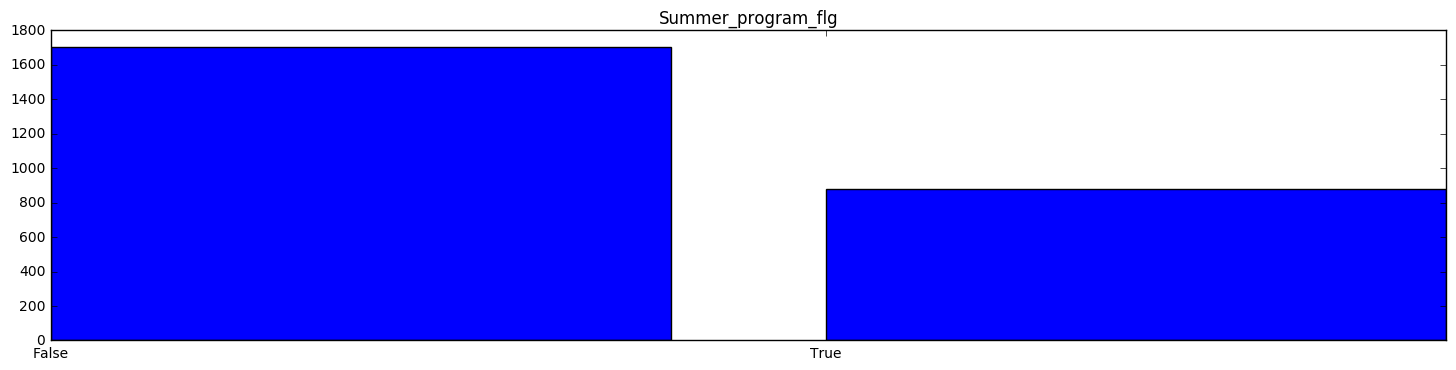

Wall time: 317 ms


In [20]:
%%time
import collections
import matplotlib.pyplot as plt
a = df_y
data=collections.Counter(a)
print('Summer_program_flg')
print(data)

names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (18,4))
plt.title('Summer_program_flg')
plt.bar(range(len(data)),values,tick_label=names)

#plt.savefig('bar.png')
plt.show()

The spread of the summer_program_flag is good  for classification with 1720 samples for false and 877 for true as shown in the bar chart above though Skewed more to the false (0) flag.

####TODO SK

In [21]:
df_X.head()

,State_Tch_Exp_Pct_4_10_Years,st_flicensed_teach_pct,st_tchyrs_4thru10_pct,total_expense_num,local_perpupil_num,RETAINED_Dist_Pct,PROMOTED_Dist_Pct,st_crime_per_c_num,Math Score,Reading SPG Score,...,grades_BYOD,school_type_txt,Reading SPG Grade,grades_1_to_1_access,title1_type_flg,EVAAS Growth Status,SPG Grade,clp_ind_flg,Math SPG Grade,Overall_Achievement_Score_bins
0,0.226,0.808,0.226,8297.25,2871.810,0.142,0.870,0.58,53.0,60.0,...,-,Regular School,C,-,False,Met,C,False,C,55-69
1,0.254,0.895,0.254,7955.28,2453.720,0.142,0.870,0.24,53.0,60.0,...,-,Regular School,C,-,False,Met,C,False,C,55-69
2,0.235,0.897,0.235,8358.47,2423.365,0.142,0.870,1.27,53.0,60.0,...,-,Regular School,C,-,False,Met,C,False,C,55-69
3,0.273,0.975,0.273,8358.47,2423.365,0.175,0.825,0.21,53.0,60.0,...,-,Regular School,C,-,False,Met,C,False,C,55-69
4,0.273,0.975,0.273,8358.47,2423.365,0.175,0.825,0.21,53.0,60.0,...,-,Regular School,C,-,False,Met,C,False,C,55-69


In [22]:
%%time
def dummy_Create(df):
    schoolDataFinal = df.copy()
    SchoolDataCat = schoolDataFinal.loc[:,(schoolDataFinal.dtypes == object)|(schoolDataFinal.dtypes == 'category')]
    
    
    print(SchoolDataCat.columns)
    cat_vars=SchoolDataCat.columns
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(schoolDataFinal[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars=SchoolDataCat.columns
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]

    ## Final data columns
    data_final=data[to_keep]
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    y=['summer_program_flg']
    X=[i for i in data_final_vars if i not in y]
 
    list(data_final_vars)
    print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final.abs())
    
df_X_new = dummy_Create(df_X)


Index(['esea_status', 'Grad_project_status', 'State Gap Compared',
       'type_cd_txt', 'scity_ad', '1_to_1_access', 'calendar_only_txt', 'Byod',
       'category_cd', 'grades_BYOD', 'school_type_txt', 'Reading SPG Grade',
       'grades_1_to_1_access', 'EVAAS Growth Status', 'SPG Grade',
       'Math SPG Grade', 'Overall_Achievement_Score_bins'],
      dtype='object')
['summer_program_flg']
Wall time: 352 ms


> For the purpose of modeling, we encode selected categorical columns as individual integer columns with 1 and zeros. This is achived using the function  above which identifies catagorical columns and creates dummy variables for them then deletes the old features from where the dummy variables have been derieved from. 

> When we attempted to run the logistic model the firt time we noticed that some boolean columns we encoded as -1 and 0. We called abs() fuction on the data to convert all the negative values to positive in order to run our model.

In [23]:
df_X = df_X_new.copy()
df_X.shape

(2579, 828)

# pickle the data set
df_X.to_pickle('df_X.pickle')
df_y.to_pickle('df_y.pickle')



df_X = pd.read_pickle('df_X.pickle')

## Comparing SVM vs Logistic regression accuracy on the same raw data dataset

> After completing the data encoding, we split our data into 80% instances for train dataset and the remaining 20% for the test dataset. We use a random_state seed of 4 to ensure reproducibility of our results.

> For the purposes of cross validation, we repeat this process of separating the testing and training data 3 times. We will use this cross validation method built into scikit-learn.

> To easily compare the performance of SVM and Logistics regression models in classification, we run both models back to back on the same dataset

> `The Code block below is derived from Professor Larson's notebook on Logits and SVM for MSDS 7331` https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb


In [24]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import pandas as pd

Frame = pd.DataFrame() # define dataframe to hold accuracy score

X = df_X.values
y = df_y.values

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 4)
                         
print(cv_object)
svc = SVC() #create a resusable SVC object

lr_clf = LogisticRegression() # get object

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable SVC model on the training data
    svc.fit(X_train,y_train)  # train object
    y_hat_SVC = svc.predict(X_test) # get test set precitions
    
    #train the resusable Logistic Regression Model on training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat_lr = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_SVC = mt.accuracy_score(y_test,y_hat_SVC)
    acc_LR = mt.accuracy_score(y_test,y_hat_lr)
    #conf = mt.confusion_matrix(y_test,y_hat_SVC)
    print("====Iteration",iter_num," ====")
    print("SVM accuracy :", acc_SVC )
    print("LR  accuracy :", acc_LR )
    temp = {'Iteration':iter_num,'SVM Accuracy':acc_SVC,'Logits Accuracy':acc_LR}
    Frame = Frame.append(pd.DataFrame(list(temp.items()), columns =['Category', 'Value']), ignore_index=True)
    #print("confusion matrix\n",conf)
    iter_num+=1

ShuffleSplit(n_splits=3, random_state=4, test_size=0.2, train_size=None)
====Iteration 0  ====
SVM accuracy : 0.711240310078
LR  accuracy : 0.757751937984
====Iteration 1  ====
SVM accuracy : 0.68023255814
LR  accuracy : 0.744186046512
====Iteration 2  ====
SVM accuracy : 0.68023255814
LR  accuracy : 0.767441860465
Wall time: 33.9 s


> On the raw dataset,both SVM and Logits are able to classify a school as having either a summer program or not with accuracies above 65%. On three iterations of shuffle split for training and predictions on the same dataset, Logistic regression performs slightly better with scores of [80%, 79.6% and 78.4%] vs SVM scores of [77%, 76% and 76%]. This are results using the same dataset for both models

**TODO** update the text to reflect the findings.

## Tune Logistic Regression and SVM models

### Approach 1: Finding the optimal number of features to use using Chi-Squared

> To further optimize the performance of our models we explore feature selection using chi-squared test. As a recap, chi-square test measures dependence between stochastic variables, so using this function we hope to weed out the features that are the most likely to be independent of class and therefore irrelevant for classification.

> Below, we run a systematic feature selection to identify the optimal number of features that we need to fit our data the best by looking at the model accuracy based on % of features used. We run this using both SVM and Logits.  Like what we did previously we split our data to 20% test and 80% training sets

> Reference:

> >https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Titanic.ipynb 

> >http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html


In [25]:
#create test and training sets from data and target created above
X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 4)

In [26]:
%%time
from sklearn import cross_validation
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
LR = LogisticRegression() 
SV = SVC()


percentiles = range(1, 100, 5)
results = []
results2 = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(LR, X_train_fs, y_train, cv=10)
    scores2 = cross_validation.cross_val_score(SV, X_train_fs, y_train, cv=10)
    print(i,' LR : ',scores.mean())
    print(i,' SVM :',scores2.mean())
    results = np.append(results, scores.mean())
    results2 = np.append(results2, scores2.mean())
    

1  LR :  0.678613514845
1  SVM : 0.667478862479
6  LR :  0.749349436092
6  SVM : 0.654873851349
11  LR :  0.734340646455
11  SVM : 0.654873851349
16  LR :  0.748933991586
16  SVM : 0.654873851349
21  LR :  0.791591758577
21  SVM : 0.655844725136
26  LR :  0.768295500464
26  SVM : 0.655844725136
31  LR :  0.776083416314
31  SVM : 0.656813253816
36  LR :  0.777012258589
36  SVM : 0.657781782497
41  LR :  0.775595656864
41  SVM : 0.657781782497
46  LR :  0.780438390464
46  SVM : 0.65826721939
51  LR :  0.78526006321
51  SVM : 0.658757323946
56  LR :  0.767340997319
56  SVM : 0.661667600199
61  LR :  0.774599167307
61  SVM : 0.664087771897
66  LR :  0.767770377165
66  SVM : 0.666510288701
71  LR :  0.771670197855
71  SVM : 0.67135998997
76  LR :  0.778968121895
76  SVM : 0.676207346134
81  LR :  0.759079257359
81  SVM : 0.673301737543
86  LR :  0.754206262876
86  SVM : 0.676695105584
91  LR :  0.76101631472
91  SVM : 0.681544806853
96  LR :  0.760059511569
96  SVM : 0.684455083107
Wall tim

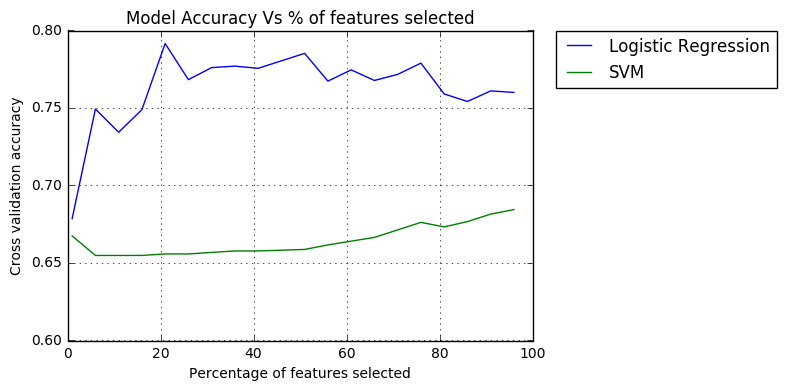

In [36]:
###### Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results, label="Logistic Regression")
pl.plot(percentiles,results2, label="SVM")
plt.axis([0, 100, 0.6, 0.8])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Model Accuracy Vs % of features selected')
plt.grid(True)

> The figure above Visualizes comparison of cross validation accuracy vs percentage of features selected for both SVM and Linear Regression model on our North Carolina education data. 

> **We note the following trends:** 

> 1. For Linear Regression model; 46% of the features gives us the best performing model that fits our data well.  When more than 46% of the features are used, accuracy for Logistic regression model starts to degrade.

> 2.  Accuracy for SVM increases with increasing number of features used. The only down side is it takes much longer to train an SVM model with the increase in the number of features. 

> 3.  Across the board, logistic regression is superior to SVM for classification accuracy regardless of the number of features used.

> We choose to proceed with 46% of the features as our optimal number of features to use for our classification task.

In [45]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=51)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)
print('')
Chi2_Score = pd.DataFrame()

for i in range(len(df_X.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': df_X.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score   

[False False False  True  True False False False  True  True  True  True  True
 False  True False False False  True  True  True False False False False False
  True False False False False  True False False  True  True  True  True False
 False False  True  True  True  True  True False False False False False False
  True  True  True False False  True False  True  True  True  True  True  True
  True  True  True  True False False False False False False False False  True
  True  True  True  True False False  True False False False  True  True  True
 False False False False  True  True False  True  True  True False False  True
 False False False False  True  True False False False False False False False
 False False False False  True False False False False False False  True  True
 False False False False  True  True  True  True  True  True  True False False
 False  True False False False False False False  True  True False False False
 False False False False False False False False Fal

,Feature,chi-squared
0,total_expense_num,124.591269
1,local_perpupil_num,90.280231
2,Math Score,115.819749
3,Reading SPG Score,45.293129
4,Read Score,84.815191
5,SchoolWeightedScore,35.709018
6,SPG Score,80.969567
7,Math SPG Score,66.795962
8,English II Score,11.054753
9,The ACT Score,20.562560


> * In the code above, we select 46% of the features in our training set based on Chi2 test.
> * Above table shows our selected features with their chi-squared score

In [29]:
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

In [46]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dt = LogisticRegression()
sv = SVC()

lencol = int(0.51*X_train.shape[1]) #count 51% of the columns
X_new = SelectKBest(chi2, k=lencol).fit_transform(X_train, y_train) #select the  best cols

scores = cross_validation.cross_val_score(dt, X_new, y_train, cv=20)
scores2 = cross_validation.cross_val_score(sv, X_new, y_train, cv=20)

#values for 30 fold cross validation
print('Logistic Regression 20 fold cross validation score')
print('-------------------------------')
print(scores)
#average score
print('-------------------------------')
print('Logits average score of the 20 fold cross validation')
print(scores.mean())
#values for 30 fold cross validation
print('SVM 20 fold cross validation score')
print('-------------------------------')
print(scores2)
#average score
print('-------------------------------')
print('SVM average score of the 20 fold cross validation')
print(scores2.mean())


Logistic Regression 20 fold cross validation score
-------------------------------
[ 0.77  0.78  0.72  0.76  0.8   0.78  0.83  0.81  0.79  0.82  0.83  0.76  0.74
  0.82  0.76  0.73  0.7   0.8   0.81  0.69]
-------------------------------
Logits average score of the 20 fold cross validation
0.773968904216
SVM 20 fold cross validation score
-------------------------------
[ 0.65  0.64  0.65  0.67  0.65  0.65  0.66  0.67  0.68  0.66  0.65  0.65  0.66
  0.67  0.67  0.66  0.67  0.66  0.66  0.67]
-------------------------------
SVM average score of the 20 fold cross validation
0.660691692659
Wall time: 1min 20s


> A Logistics regression model trained and tested on the training dataset with 51% of features selected based on the chi-square yields 77% accurancy as shown above where as SVM yields 66%.

### Approach 2: Logistics Regression and SVM Models'  paramater Tuning

### SECTION 2 [10 Points]:

1. Discuss the advantages of each model for each classification task. 
2. Does one type of model offer superior performance over another in terms of prediction accuracy? 
3. In terms of training time or efficiency? Explain in detail.

### Advantages and Disadvantages of  SVM vs  Logistic Regression

 #### Advantages

> ** Logistic Regression **
> * ** ` Simple nice probabilistic interpretation: `**
> Since Predictions are mapped to be between 0 and 1 through the logistic function, predictions can be interpreted as class probabilities. This makes Logistic regression a much simpler model to interprate compared to SVM.


> ** SVM **

> * ** ` Less overfitting, robust to noise: `**
> Generally speaking, SVM is robust to outliers for cases where data is linearly separable as it considers only support vectors to set the boundary.Any interior points aren't going to affect the boundary. Once the support vectors are identified, all others instances in the training data could be deleted without changing the position of the dividing hyperplane


 #### DisAdvantages

> ** Logistic Regression **

> * ** `Overfitting the Model: `**
> Logistic regression tends to be vulnerable to overconfidence in cases involving imbalanced classes. In such cases, Logistic regression model tends to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.  This is particular important aspect to consider for our model where our predicted variable summer_program_flag is imbalanced with False: 1702 and True: 877 observations. 

>    Reference: https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/
>* **`Limited Outcome Variables: `** 
> Logistic regression works well for predicting categorical outcomes like admission and rejection but not continuous like graduation rate which what we plan to predict in Lab 2. We were tempted to attempt to convert the graduation rate into discrete categories like "high graduation" or "low graduation", based on a selected threshold but by doing so we would sacrifice the precision of the data set. This is a significant disadvantage when working with data on a continuous scale. Considering that we decided to classify schools based on whether they have a summer program or not which was already a categorical variable.

> ** SVM **

> * **`Long training time on large data sets: ` **
> Not considering stochastic gradient descent, SVM is Computationally expensive, thus runs slow.  Shown below, it took 7.36 sec to train an SVM model vs 1.4 seconds needed on the small dataset. These times are bound to scale exponentially for a larger dataset.


### Training Time  and Prediction accuracy: SVM vs Logistic Regression

###  ** Training time **

> #### 1. Logistic Regression

In [58]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
dt = LogisticRegression(random_state = 4)

scores = cross_validation.cross_val_score(dt, X_train_new, y_train, cv=30)

#values for 30 fold cross validation
print('Logistic Regression 30 fold cross validation score')
print('-------------------------------')
print(scores.mean())



Logistic Regression 30 fold cross validation score
-------------------------------
0.771579791337
Wall time: 26.4 s


> #### 2. SVM

In [59]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sv = SVC(random_state = 4)

scores = cross_validation.cross_val_score(sv, X_train_new, y_train, cv=30)

#values for 30 fold cross validation
print('SVM 30 fold cross validation score')
print('-------------------------------')
print(scores.mean())

SVM 30 fold cross validation score
-------------------------------
0.659259123939
Wall time: 1min 21s


> #### 3. SGD

In [60]:
%%time
from sklearn.linear_model import SGDClassifier

sgd_logreg = SGDClassifier(random_state = 4)

scores = cross_validation.cross_val_score(sgd_logreg, X_train_new, y_train, cv=30)


#values for 30 fold cross validation
print('SGD 30 fold cross validation score')
print('-------------------------------')
print(scores.mean())

SGD 30 fold cross validation score
-------------------------------
0.645182884748
Wall time: 2.18 s


Fitting SVM in its own is slower than Linear regression model. It takes about 3X longer to train SVM (1min 21s) compared to Linear regression (26.4 s) on the same selected dataset. Stochastic Gradient Descent is 10X much fastest than Linear regression on our selected dataset. 

###  ** Predictive Power **

> #### 1. Logistic Regression

In [43]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logis= LogisticRegression() 
logis.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = logis.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logis.score(X_test_new, y_test))) 
conf = mt.confusion_matrix(y_test,y_pred)
print("confusion matrix\n",conf)


Accuracy of logistic regression classifier on test set: 0.8004
confusion matrix
 [[306  45]
 [ 58 107]]
Wall time: 1.07 s


> #### 2. SVM

In [61]:
%%time
from sklearn import metrics
from sklearn.svm import SVC
SV = SVC()
SV.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = SV.predict(X_test_new)
print('Accuracy of SVM classifier on test set: {:.4f}'.format(SV.score(X_test_new, y_test))) 
conf = mt.confusion_matrix(y_test,y_pred)
print("confusion matrix\n",conf)


Accuracy of SVM classifier on test set: 0.6899
confusion matrix
 [[351   0]
 [160   5]]
Wall time: 4.26 s


> #### 3. SGD

In [62]:
%%time
from sklearn import metrics
from sklearn.linear_model import SGDClassifier

sgd_logreg = SGDClassifier(random_state = 4)

sgd_logreg.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = SV.predict(X_test_new)
print('Accuracy of SGD classifier on test set: {:.4f}'.format(sgd_logreg.score(X_test_new, y_test))) 
conf = mt.confusion_matrix(y_test,y_pred)
print("confusion matrix\n",conf)


Accuracy of SGD classifier on test set: 0.6880
confusion matrix
 [[351   0]
 [160   5]]
Wall time: 762 ms


> >From an accuracy standpoint, Linear Regression with 80.0%  is the clear winner followed by SVM and SGD which show similar prediction accuracy of ~68.8%

 ## Summary

> Referencing the advantages and disadvantages; training time and model accuracy discussed above, below we summaries which model has an upper hand considering our dataset. Our analysis is based on using our final dataset with limited more critical features selected by Chi-Squared. Our training set has 380 features and 516 observations.

>* **** Model Training Time : **** 
> As illustrated above,SVM training with stochastic gradient descent for 30 cross validations about 10X much faster for our selected data set (~2.16s) vs. logistic regression training (~26s). This time is bound to increase with an increase in the sie of our dataset. In this regard **`SVM with Stochastic gradient descent`** is the winner.

>* **** Model Prediction Accuracy : **** 
> For a 30 fold cross validation, **`Linear Regression`** is the clear winner with an accuracy of ~77% vs base SVM accuracy of 65% or SVM with stochastic gradient descent of 64%.

>* **** Advantages and Disadvantages : ****  
> In the advantages and disdantages section we mentioned how Linear regression is simple to train and 





In [64]:
X_test_new.shape

(516, 380)

### SECTION 3 [30 Points]

1. Use the weights from logistic regression to interpret the importance of different features for the classification task. 
2. Explain your interpretation in detail. Why do you think some variables are more important?

### SECTION 4 [10 Points]

Look at the chosen support vectors for the classification task. 
1. Do these provide any insight into the data? Explain. 
2. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.